Reference: https://www.analyticsvidhya.com/blog/2021/05/develop-your-first-deep-learning-model-in-python-with-keras/

In [56]:
# 1.1 Call libraries
import numpy as np
import pandas as pd

# 1.2 For OS related operations
import matplotlib.pyplot as plt

# 1.3 Class for applying multiple data transformation jobs
from sklearn.compose import ColumnTransformer as ct

# 1.4 Scale numeric data
from sklearn.preprocessing import StandardScaler as ss

# 1.5 One hot encode data--Convert to dummy
from sklearn.preprocessing import OneHotEncoder as ohe

# 1.6 for data splitting
from sklearn.model_selection import train_test_split

from tensorflow import keras
#The model definition for Neural Network
from keras import models
from keras import layers



In [4]:
#Read the data file
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [5]:
#reading the file
data2=pd.read_csv("heart.csv")
data2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163,1,0.6,2,0,2,1


In [6]:
#finding out any null values
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    298 non-null    float64
 4   chol      289 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
data2.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,298.000000,289.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.436242,245.823529,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.575167,52.603205,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data2.isna().sum()

age          0
sex          0
cp           0
trtbps       5
chol        14
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak      0
slp          0
caa          0
thall        0
output       0
dtype: int64

In [10]:
data2.shape

(303, 14)

In [13]:
df = data2.dropna(axis = 0)  #drop rows with any column having np.nan values
df.shape

(286, 14)

In [16]:
df["age_cat"] = pd.cut(
                       df['age'],
                       bins = 3,           
                       labels= ["y", "m", "s"]
                      )

df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_cat
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1,s
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1,y


In [18]:
df1 = df.drop("age", axis = 1)

In [19]:
df1.head(2)

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_cat
0,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1,s
1,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1,y


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['age_cat']=le.fit_transform(df1['age_cat'])
df1.head(2)


,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_cat
0,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1,1
1,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1,2


In [26]:
#accesing certain part of data using 'iloc'
X=df1.iloc[:,0:11].values
y=df1.iloc[:,12].values

X.shape, y.shape

((286, 11), (286,))

In [28]:
#splitting the data for training and testing. 10% data will be used for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
print (X_train.shape)
print (X_test.shape)

(200, 11)
(86, 11)


In [47]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

#Creating Neural Network
model=Sequential()
model.add(Dense(12,input_dim=X.shape[1],activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='softmax'))
#16 neurons in the first hidden layer. 12 in the second hidden layer. 2 will be in the output layer.

In [48]:
#compiling data and optimizing it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.fit(X_train,y_train, epochs=10, batch_size=10)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 1.1453 - accuracy: 0.5400
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.5400
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8208 - accuracy: 0.5400
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.5400
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.5400
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5400
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.5400
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.5400
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.5400
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.5400


In [50]:
#predicting the model
y_pred=model.predict(X_test)

In [51]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,test)

1.0

In [53]:
#running the testing data
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=6)

Epoch 1/10
34/34 [==============================] - 1s 10ms/step - loss: 0.7147 - accuracy: 0.5400 - val_loss: 0.5009 - val_accuracy: 0.5581
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 0.7572 - accuracy: 0.5400 - val_loss: 0.4412 - val_accuracy: 0.5581
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 0.7418 - accuracy: 0.5400 - val_loss: 0.6715 - val_accuracy: 0.5581
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.5400 - val_loss: 0.3468 - val_accuracy: 0.5581
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 0.5424 - accuracy: 0.5400 - val_loss: 0.6956 - val_accuracy: 0.5581
Epoch 6/10
34/34 [==============================] - 0s 5ms/step - loss: 0.7157 - accuracy: 0.5400 - val_loss: 0.4165 - val_accuracy: 0.5581
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.5400 - val_loss: 0.3629 - val_accuracy: 0.5581
Epoch 8/10
34/34 [=

In [54]:
#defining the values
history.history["val_accuracy"]

[0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115,
 0.5581395626068115]

<function matplotlib.pyplot.show>

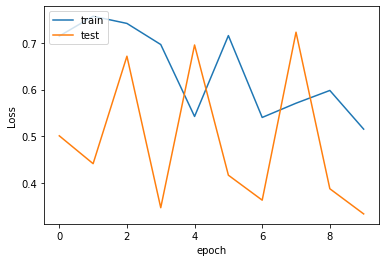

In [55]:
#plotting data on the map
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="upper left")
plt.show